# Example of accessing raw data at CCIN2P3


- work with Weakly_2022_09
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/03/10
- updatz : 2022/03/14



In [1]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/atmospec 	setup
eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_09/conda/envs/lsst-scipipe-2.0.0/eups 	setup
rapid_analysis        LOCAL:/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/repos/w_2022_09/rapid_analysis 	setup


In [2]:
! echo $IMAGE_DESCRIPTION
! eups list -s lsst_distrib


   g64fc59b30a+e1dba0a6f6 	w_latest w_2022_09 current setup


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch


In [4]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')

In [5]:
import lsst.daf.butler as dafButler

In [6]:
repo = '/sps/lsst/groups/auxtel/softs/shared/auxteldm_gen3/data/butler.yaml'
butler = dafButler.Butler(repo)
registry = butler.registry

# test

(-0.5, 4071.5, -0.5, 3999.5)

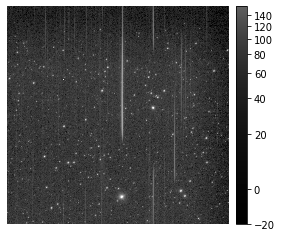

In [7]:
collection = "u/dagoret/first_test"
im = butler.get('postISRCCD', dataId={'exposure': 2021070700317, 'instrument': 'LATISS', 'detector': 0}, collections = collection)

fig = plt.figure()
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(im.image)
plt.gca().axis('off')

In [9]:
collection = "u/dagoret/first_test"
datasetRefs = registry.queryDatasets(datasetType='spectraction', collections=collection, 
                                     where= "instrument='LATISS'")

In [10]:
all_ref_for_spectraction = []
for i, ref in enumerate(datasetRefs):
    print("======================================================= datasetType = spectraction =================================================================")
    all_ref_for_spectraction.append(ref.dataId)
    print("fullId: ",ref.dataId.full)
    print("..................................................................................")
    print("band:   ",ref.dataId["band"])
    print("type:   ",ref.datasetType)
    
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(ref.to_simple())
    print(".  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .")
    print(ref.to_json())
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    
    print("run = ",ref.run)
    print("isCalibration: ",ref.datasetType.isCalibration())
    
    print("isComponent:    ",ref.isComponent())
    
    print("isComposite:   ",ref.isComposite()) 
    
    if i> 5:
        break;

======================================================= datasetType = spectraction =================================================================
fullId:  {band: 'white', instrument: 'LATISS', detector: 0, physical_filter: 'empty~holo4_003', visit_system: 0, visit: 2021070700318}
..................................................................................
band:    white
type:    DatasetType('spectraction', {band, instrument, detector, physical_filter, visit_system, visit}, Spectraction)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
id=UUID('b57b8b02-11c7-4d67-a762-8611453bb2cd') datasetType=SerializedDatasetType(name='spectraction', storageClass='Spectraction', dimensions=SerializedDimensionGraph(names=['band', 'instrument', 'detector', 'physical_filter', 'visit_system', 'visit']), parentStorageClass=None, isCalibration=False) dataId=SerializedDataCoordinate(dataId={'band': 'white', 'instrument': 'LATISS', 'detector': 0, 'physical_filter': 

In [11]:
all_ref_for_spectraction 

[{instrument: 'LATISS', detector: 0, visit: 2021070700318, ...},
 {instrument: 'LATISS', detector: 0, visit: 2021070700319, ...},
 {instrument: 'LATISS', detector: 0, visit: 2021070700320, ...},
 {instrument: 'LATISS', detector: 0, visit: 2021070700320, ...},
 {instrument: 'LATISS', detector: 0, visit: 2021070700322, ...},
 {instrument: 'LATISS', detector: 0, visit: 2021070700323, ...},
 {instrument: 'LATISS', detector: 0, visit: 2021070700322, ...}]

In [12]:
refid0 = all_ref_for_spectraction[0]
refid0

{instrument: 'LATISS', detector: 0, visit: 2021070700318, ...}

In [13]:
postisrccd = butler.get('postISRCCD', dataId={'exposure': refid0["visit"], 'instrument': 'LATISS', 'detector': 0}, collections = collection)

(-0.5, 4071.5, -0.5, 3999.5)

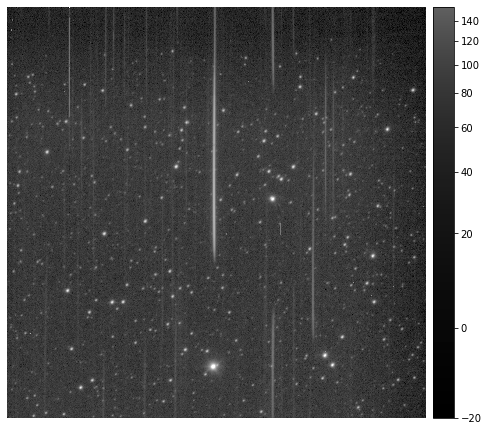

In [14]:
fig = plt.figure(figsize=(8,8))
afw_display = afwDisplay.Display(1)
afw_display.scale('asinh', 'zscale')
afw_display.mtv(postisrccd.image)
plt.gca().axis('off')

In [15]:
spectraction  = butler.get('spectraction', dataId=refid0, collections = collection)

In [16]:
image = spectraction.image

In [17]:
img = image.data

In [19]:
#transform = AsinhStretch() + PercentileInterval(99.)
transform = PercentileInterval(98.)

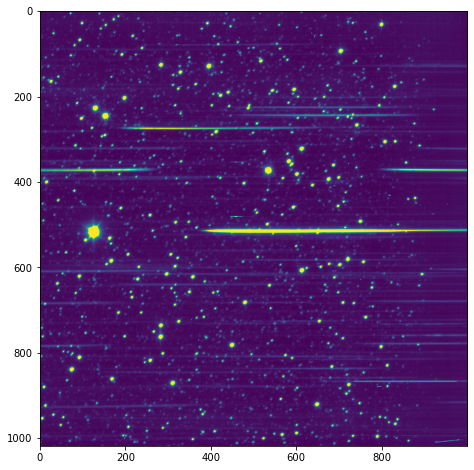

In [20]:
fig = plt.figure(figsize=(8,8))
plt.imshow(transform(img))
plt.show()